In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape, Polygon, Point
import os
from pathlib import Path
import time

import random

import rasterio
from rasterio.transform import from_origin
import numpy as np



In [6]:
from rural_beauty.config import data_dir, CLC_coverage_EU_dir, unique_raster, beauty_raster, NUTS_EU, powerlines_EU_raster, protected_raster



In [3]:
schoenheit_path = beauty_raster
unique_path - unique_raster

features_beauty = {
 'dem_1_2'  : data_dir / 'cleaned/dem/neighborhood/DEM_DE_range_zone1_2.tif',
 'dem_3_4'  : data_dir / 'cleaned/dem/neighborhood/DEM_DE_range_zone3_4.tif', 
 'obst_1_4' : CLC_coverage_EU_dir / 'neighborhood/code_obst_zone1_4.tif',
 'wald_1_4' : CLC_coverage_EU_dir / 'neighborhood/code_wald_zone1_4.tif',
 'natgru_2' : CLC_coverage_EU_dir / 'neighborhood/code_natgru_zone2.tif',
 'acker_1_4': CLC_coverage_EU_dir / 'neighborhood/code_acker_zone1_4.tif',
 'stoer_1'  : CLC_coverage_EU_dir / 'code_stoer.tif',
 'stoer_2'  : CLC_coverage_EU_dir / 'neighborhood/code_stoer_zone2.tif',
 'stoer_3'  : CLC_coverage_EU_dir / 'neighborhood/code_stoer_zone3.tif',
 'noveg_2'  : CLC_coverage_EU_dir / 'neighborhood/code_noveg_zone2.tif', 
 'seemee_1' : CLC_coverage_EU_dir / 'code_seemee.tif',
 'spfr_1'   : CLC_coverage_EU_dir / 'code_spfr.tif',
 'heide_1'  : CLC_coverage_EU_dir / 'code_heide.tif',
 'weanl_1_4': data_dir / 'cleaned/osm/neighborhood/freq_windpowerplants_DE_4647_zone1_4.tif', 
 'stra_1_2' : data_dir / 'cleaned/osm/neighborhood/len_streets_DE_4647_zone1_2.tif', 
 'leit_1'   : powerlines_EU_raster
           }


features_unique = {
 'dem_1'    : data_dir / 'cleaned/dem/DEM_EU_range.tif',
 'dem_3'    : data_dir / 'cleaned/dem/neighborhood/DEM_EU_range_zone3.tif',
 'seemee_1' : CLC_coverage_EU_dir / 'code_seemee.tif',
 'heide_1'  : CLC_coverage_EU_dir / 'code_heide.tif',
 'sgall'    : data_dir / protected_raster,
 'natgru_1_2' : CLC_coverage_EU_dir / 'neighborhood/code_natgru_zone1_2.tif',
 'wein_1'   : CLC_coverage_EU_dir / 'code_wein.tif', 
 'acker_1_2': CLC_coverage_EU_dir / 'neighborhood/code_acker_zone1_2.tif',
 'stoer_1_2'  :CLC_coverage_EU_dir / 'neighborhood/code_stoer_zone1_2.tif',
 'stra_1' : data_dir / 'cleaned/osm/len_streets_EU_4647.tif', 
 'leit_1'   : data_dir / 'cleaned/osm/len_powerlines_EU_4647.tif', 
           }




NUTS_path = NUTS_EU

In [14]:
# optionally include every CLC layer. 
for file in os.listdir(CLC_coverage_EU_dir):
    if file.endswith(".tif"):
        temp_path = Path(CLC_coverage_EU_dir / file)
        temp_name = temp_path.stem + "_1"
        
        # check if it is already in the features dict
        if temp_name in features.keys():
            continue
        else:
            features[temp_name] = temp_path
        

code_offen
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_offen.tif
code_abbau
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_abbau.tif
code_salzw
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_salzw.tif
code_landwi
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_landwi.tif
code_hafen
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_hafen.tif
code_bebau
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_bebau.tif
code_kraut
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_kraut.tif
code_feucht
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_feucht.tif
code_spfr
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/layer_coverage_EU/code_spfr.tif
code_stoer
/h/u145/hofer/MyDocuments/Granular/beauty/data/cleaned/clc/l

In [4]:
import os
some_missing = False
for label, path in features.items():
    if os.path.exists(path):
        # print(f"{path} is there")
        some_missing = True
        pass
    else:
        print(f"{path} is missing")

if not some_missing:
    print("All files exist")

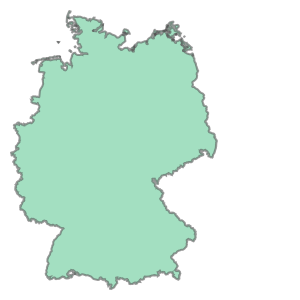

In [5]:
NUTS = gpd.read_file(NUTS_path)
polygon = NUTS.geometry.iloc[0]
polygon


In [6]:
# Function to generate random points within a polygon
def generate_random_points(polygon, num_points):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < num_points:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

# Function to extract raster values at given points and recode the NA value to -99
def extract_raster_values(raster_path, points):
    with rasterio.open(raster_path) as src:
        nodata = src.nodata  # Get the nodata value from the raster metadata
        values = []
        for point in points:
            # Sample the raster at the given point
            sample = src.sample([(point.x, point.y)]).__next__()[0]
            if sample == nodata:
                values.append(-99)  # Recode nodata values to -1
            else:
                values.append(sample)  # Use the actual sample value if it's not nodata
    return values

def return_crs(raster_path):
    with rasterio.open(raster_path) as src:
        return src.crs

def return_NoDatavalue(raster_path):
    with rasterio.open(raster_path) as src:
        return src.nodata

In [7]:
# Number of random points
N = 10000

# Generate random points
random_points = generate_random_points(polygon, N)

# Extract values from the rasters
coords_df = {}
coords_df['x_coord'] = [p.x for p in random_points]
coords_df['y_coord'] = [p.y for p in random_points]
outcome_df = {}
outcome_df['schoen']  = extract_raster_values(schoenheit_path, random_points)


predictors_df = {}
for label, path in features.items():
    predictors_df[label] = extract_raster_values(path, random_points)

predictors_df = pd.DataFrame(predictors_df)
outcome_df = pd.DataFrame(outcome_df)
coords_df = pd.DataFrame(coords_df)
predictors_df.head()

,dem_1_2,dem_3-4,obst_1_4,wald_1_4,natgru_2,acker_1_4,stoer_1,stoer_2,stoer_3,noveg_2,seemee_1,spfr_1,heide_1,hemero_1,weanl_1_4,stra_1_2,leit_1
0,134.862808,76.617119,0.000000,0.214094,0.000000,0.014948,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3.939289,0.019672,8.661449,0.0
1,451.755280,265.898926,0.000000,0.522608,0.321366,0.003667,0.0,0.0,0.000000,0.0,0.0,0.0,0.313059,2.271577,0.003279,453.061401,0.0
2,83.484497,138.623627,0.110954,0.438052,0.000000,0.129001,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3.374228,0.000000,0.000000,0.0
3,12.056692,16.249565,0.000000,0.091117,0.000000,0.734271,0.0,0.0,0.030410,0.0,0.0,0.0,0.000000,4.653807,0.278689,582.094421,0.0
4,36.625645,43.724705,0.000000,0.193918,0.000000,0.721993,0.0,0.0,0.013511,0.0,0.0,0.0,0.000000,3.181509,0.081967,497.471802,0.0


In [8]:
from rural_beauty.config import predictors_DE, beauty_DE, coords_DE


# Ensure the directory exists
os.makedirs(os.path.dirname(predictors_DE), exist_ok=True)

# Write DataFrames to CSV files
predictors_df.to_csv(predictors_DE, index=False)
outcome_df.to_csv(beauty_DE, index=False)
coords_df.to_csv(coords_DE, index=False)
